# Optimizing the Python Code for Big Data 
Balancing Coding Complexity against Computational Complexity 
    
    AUTHOR: Dr. Roy Jafari 


# Chapter 2: Choosing the right data types 

## Challenge 3: float32 or float64?

1.	In the experiment, we want to run we will compare the RAM and CPU performance of our computer in regard to six DataFrames. We will keep everything the same but two aspects of these dataframes: their number of rows, and their data types. The DataFrames can have one of the following possible number of rows: *1,000,000*, *10,000,000*, or *100,000,000*. Moreover, the values in the DataFrame will either be *float32* or *float64*. The following code creates the dictionary of dictionary `dfs` that will be holding all the DataFrames that we will randomly generate for this experiment. Run the following code and study its output.

In [1]:
import numpy as np
import pandas as pd
float_dtypes = ['float32','float64']
n_rows = [10**6,10**7,10**8]
dfs = {dtype:{n:None for n in n_rows} for dtype in float_dtypes} 
print(dfs)

{'float32': {1000000: None, 10000000: None, 100000000: None}, 'float64': {1000000: None, 10000000: None, 100000000: None}}


2.	In the preceding code, were you able to understand the following line?

`dfs = {bits:{n:None for n in n_rows} for bits in float_bits}`

If yes, just go to the next step, if not Google List Comprehension and learn about it. 

**Answer**: List Comprehension is a one-line iterator that is generated from other iterables such as lists and tuples. It has the benefit of having cleaner codes. Also, in python, the list comprehension is optimized.

3.	The following code generates the corresponding DataFrames for our experiment. We will have six DataFrames with one of the listed data types and the number of rows. Run the following code, and then go to the next step. 

In [2]:
import itertools as itt
for dtype,n in itt.product(float_dtypes,n_rows):
    df = pd.DataFrame(
        np.random.random([n,3]),
        columns=['RC1','RC2','RC3'],
        dtype=dtype
        )
    dfs[dtype][n] = df

4.	Are you familiar with `itertools`? If yes, just move to step 6. If not, you want to Google it. It is a useful Python Library that will allow you to do various types of iterations. Here, we are just using it to clean up our code. The following code does the same iterations we are creating in the preceding code, twice, once using `itertools` and once with regular for loops. Run the code, and then document your findings. 

In [3]:
for dtype,n in itt.product(float_dtypes,n_rows):
    print(dtype, n)
    
print('\r\n--DIVIDE--\r\n')

for dtype in float_dtypes:
    for n in n_rows:
        print(dtype, n)

float32 1000000
float32 10000000
float32 100000000
float64 1000000
float64 10000000
float64 100000000

--DIVIDE--

float32 1000000
float32 10000000
float32 100000000
float64 1000000
float64 10000000
float64 100000000


**Answer**: The loops perform similarly, however, the first one, the one using itertools, is cleaner.

5.	The following code creates `exp_df` which is the DataFrame we will use to record our measurements for this experiment. The measurements we will use are `MemeoryUsage` and `RunTime`. Please pay attention that `exp_df` has multi-level indexing. Run the code, study its output and then go to the next step.

In [4]:
multi_index = pd.MultiIndex.from_product(
    [float_dtypes, n_rows],
    names= ['Dtype','n_rows']
)
exp_df = pd.DataFrame(
    index = multi_index,
    columns= ['MemeoryUsage (KB)','RunTime']
)
print(exp_df)


                  MemeoryUsage (KB) RunTime
Dtype   n_rows                             
float32 1000000                 NaN     NaN
        10000000                NaN     NaN
        100000000               NaN     NaN
float64 1000000                 NaN     NaN
        10000000                NaN     NaN
        100000000               NaN     NaN


6.	The following code fills up the first column in `exp_df`; in other words, it grabs the `MemoryUsage` from each of the DataFrames in `dfs` and records them in `exp_df`. Run the code and study its outputs. 

In [5]:
for dtype,n in itt.product(float_dtypes,n_rows):
    wdf = dfs[dtype][n]
    usage = wdf.memory_usage().sum()//1000
    exp_df.at[(dtype,n),'MemeoryUsage (KB)'] = usage
print(exp_df)

                  MemeoryUsage (KB) RunTime
Dtype   n_rows                             
float32 1000000               12000     NaN
        10000000             120000     NaN
        100000000           1200000     NaN
float64 1000000               24000     NaN
        10000000             240000     NaN
        100000000           2400000     NaN


7.	After studying the output of the preceding code, what is your observation regarding the relationship between the number of rows and `MemoryUsage`? What are your observations regarding the relationship between the choice of data types *float32* or *float64* and `MemoryUsage`?

**Answer**:

**what is your observation regarding the relationship between the number of rows and `MemoryUsage`?** The relationship is linear. If the number of data doubles, the memory we use will also double.

**What are your observations regarding the relationship between the choice of data types *float32* or *float64* and `MemoryUsage`?** Again the relationship is linear. *float32* uses 32 bytes for each value, and *float64* uses 64 bytes. We also can see in the output that *float64* uses twice as much memory as *float32*.

8.	The following code fills up the second column in `exp_df`; in other words, it grabs each of the DataFrames and performs the CPU-intensive task of **Principal Component Analysis (PCA)** on them; the time it takes for the computer to complete the task will be recorded under `RunTime`. Run the code and study its outputs.

In [6]:
import time
from sklearn.decomposition import PCA
pca = PCA()
for dtype,n in itt.product(float_dtypes,n_rows):
    t0 = time.time()
    wdf = dfs[dtype][n]
    pca.fit(wdf)
    exp_df.at[(dtype,n),'RunTime'] = time.time()-t0
print(exp_df)

                  MemeoryUsage (KB)    RunTime
Dtype   n_rows                                
float32 1000000               12000   1.152127
        10000000             120000   0.797505
        100000000           1200000   8.245951
float64 1000000               24000   0.294699
        10000000             240000   1.302097
        100000000           2400000  31.329841


9.	After running the preceding code, you can see the results of our experiment. However, the result might be too overwhelming for you to see, running the following code will create reports and visualizations that will make the pattern easier for you to see. What are your observations?

n_rows  1000000   10000000   100000000
Dtype                                 
float32  1.152127  0.797505   8.245951
float64  0.294699  1.302097  31.329841


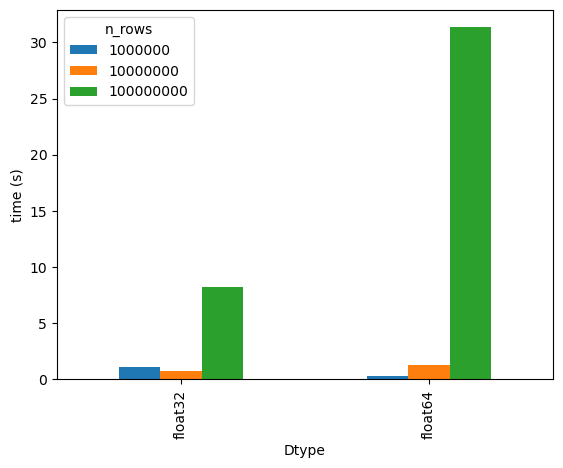

In [7]:
import matplotlib.pyplot as plt
print(exp_df.unstack().RunTime)
exp_df.unstack().RunTime.plot.bar()
plt.ylabel('time (s)')
plt.show()

**Answer**: The difference between the CPU performance for *float32 and *float64* is negligible when the DataFrame has one million rows of data, but when we move to 10 million and 100 million the difference starts to become more and more significant.

10.	Based on your experience in this challenge, fill in the blanks in the following sentences. When we have Big Data, more than one million records, it is best to use *float32* instead of *float64* when one or both of the following are correct. 1) we don’t expect our values to go beyond the range [__________, __________]; 2) we won’t need a resolution that is more precise than __________.     

**Answer**: We will use np.fifo() to answer the question.

In [8]:
import numpy as np
np.finfo('float32')

finfo(resolution=1e-06, min=-3.4028235e+38, max=3.4028235e+38, dtype=float32)

When we have Big Data, more than one million records, it is best to use float32 instead of float64 when one or both of the following are correct. 1) we don’t expect our values to go beyond the range [**-3.4028235e+38**,**3.4028235e+38**]; 2) we won’t need a resolution that is more precise than **1e-06**.